# Music Classification Project ##########

# " B 1 "


In [33]:

import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix


# Feature Extraction

# " B 2 "


In [9]:
" Block #2 "

''''
   #####################
   # feature exraction #
   #####################
''''
header = 'filename chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'

for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'ney piano santour setar tar violon'.split()

for g in genres:
    for filename in os.listdir(f'E:\_Tehran University\Term 1\ML\Project\DATA\MLDATAG2_OGG(all)\{g}'):
        songname = f'E:\_Tehran University\Term 1\ML\Project\DATA\MLDATAG2_OGG(all)\{g}\{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

# Number of Feature that extracted  : 26

# data matrix is (1490,28)


### Reading data from CSV file

# " B 3 "


In [31]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,10.ogg,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,...,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,100.ogg,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,...,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,101.ogg,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,...,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,102.ogg,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,...,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,103.ogg,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,...,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


### Dropping unneccesary columns


# " B 4 "


In [56]:
data = data.drop(['filename'],axis=1)
# file name can drop

genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

print(y)
data.head()



[0 0 0 ... 5 5 5]


,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,-21.006634,...,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,-31.510834,...,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,-15.189541,...,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,-19.073294,...,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,-5.031665,...,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


# Normalizing & Standardiztion DataSet

# " B 5 "


In [23]:
'''

    For normalizing data :
    method 1:
        use Scaler built in
    
    method 2:
        Manual and use Center and Standardize Functions
    
'''

# Method 1
# scaler = StandardScaler()
# X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

# Method 2
def center(X):
    newX = X - np.mean(X , axis = 0)
    return newX
def Standardize (X):
    newx= center(X)/np.std(X, axis=0)
    return newx

X_array= np.array(data.iloc[:, :-1], dtype = float)
X_centered =center(X_array)
X = Standardize(X_centered)


# KNN 

# " B 7 "


#############################
The best K is : 14
#############################


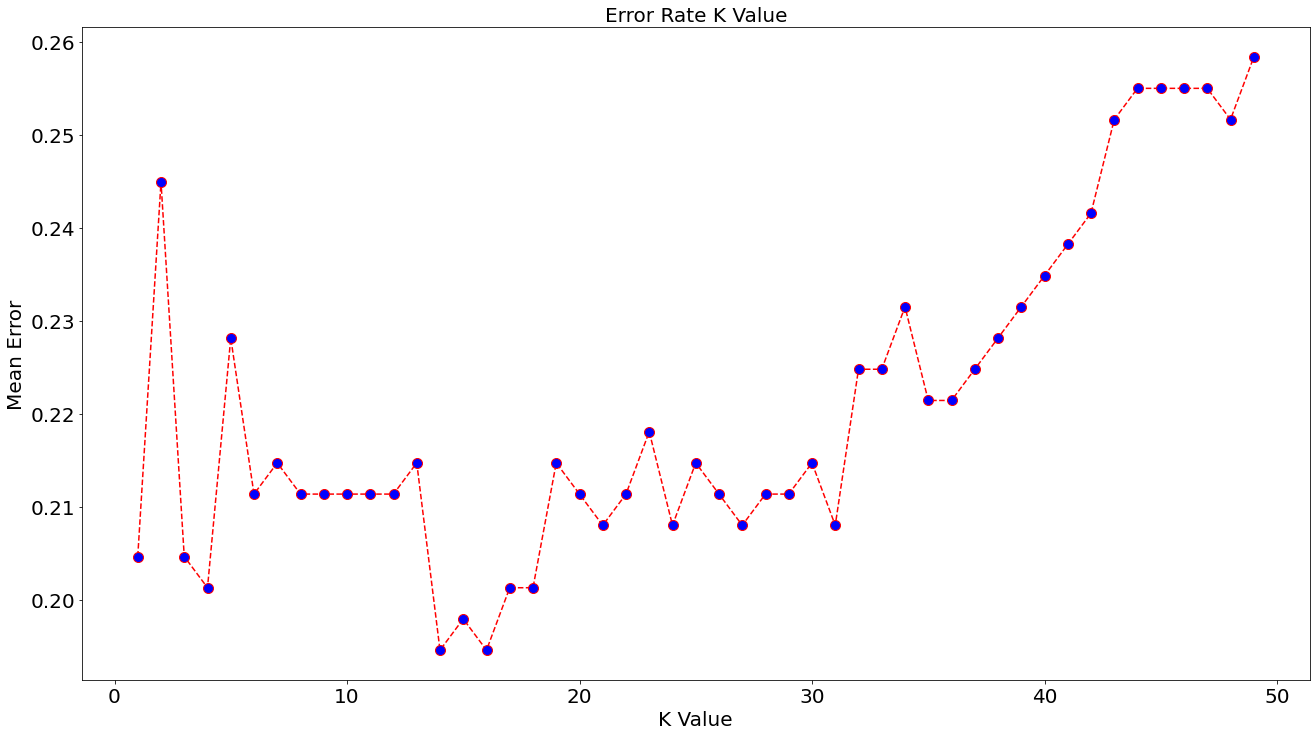

[[31  3  5  4  4  0]
 [ 0 54  0  2  0  0]
 [ 0  1 31  1  3  3]
 [ 0  1  4 42  5  1]
 [ 0  1  3  4 38  4]
 [ 2  0  0  3  4 44]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.78        47
           1       0.90      0.96      0.93        56
           2       0.72      0.79      0.76        39
           3       0.75      0.79      0.77        53
           4       0.70      0.76      0.73        50
           5       0.85      0.83      0.84        53

    accuracy                           0.81       298
   macro avg       0.81      0.80      0.80       298
weighted avg       0.81      0.81      0.80       298



In [24]:
'''
    KNN Classifing

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state =42 )


# for analysing about "k" and optimum K
error = []
min_k=0
min_err = 100
for i in range (1 , 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    if error[i-1]<min_err:
        min_err = error[i-1]
        min_k = i

        
print('#############################')
print (f'The best K is : {min_k}')
print('#############################')


import matplotlib.pyplot as plt
plt.figure(figsize = (22,12))
plt.plot(range (1,50) , error , color = 'red' , linestyle = 'dashed' 
         , marker ='o' , markerfacecolor = 'blue' , markersize = 10)
plt.title ('Error Rate K Value' , fontsize = 20)
plt.xlabel('K Value' ,fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Mean Error' , fontsize=20)
plt.show()


classifier = KNeighborsClassifier( n_neighbors= min_k)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test , y_pred))


# Witening

# " B 8 "


#############################
The best K is : 6
#############################


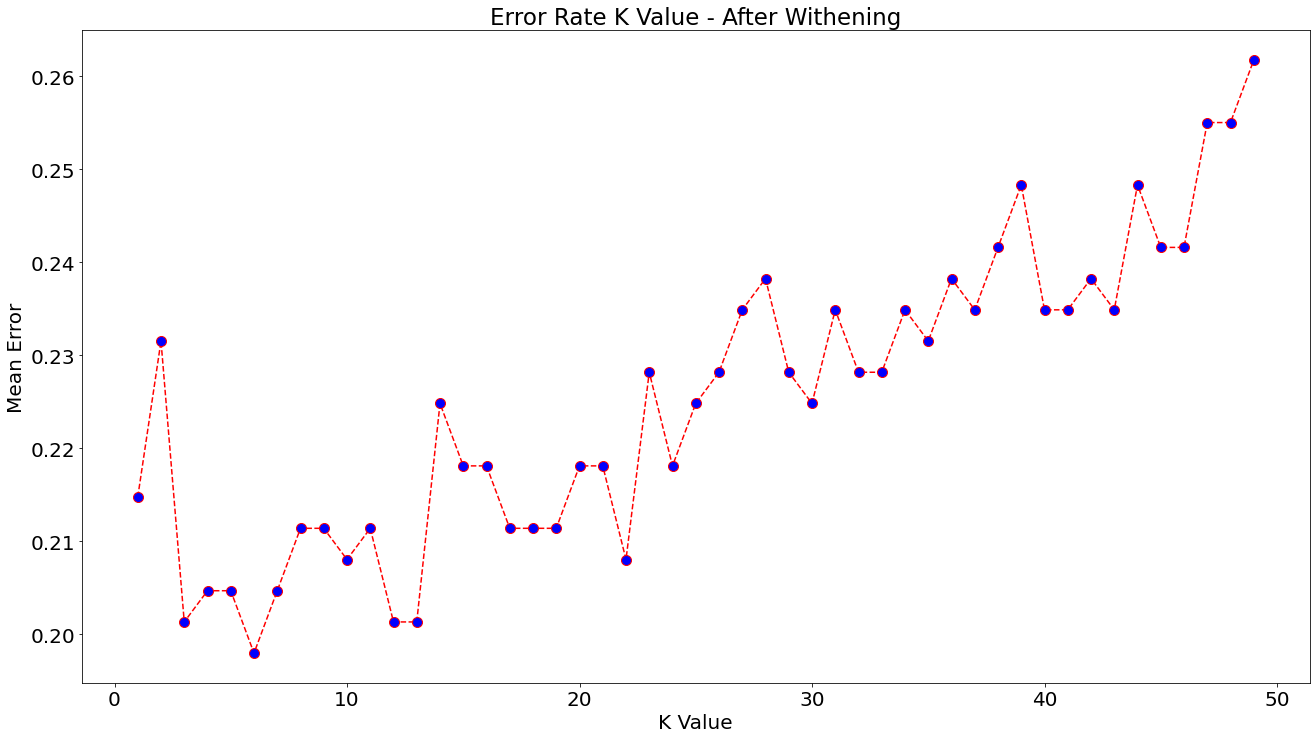

[[35  3  2  4  2  1]
 [ 1 54  0  1  0  0]
 [ 0  4 27  3  3  2]
 [ 0  2  3 39  5  4]
 [ 0  1  5  1 42  1]
 [ 5  2  1  0  3 42]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.80        47
           1       0.82      0.96      0.89        56
           2       0.71      0.69      0.70        39
           3       0.81      0.74      0.77        53
           4       0.76      0.84      0.80        50
           5       0.84      0.79      0.82        53

    accuracy                           0.80       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.80      0.80      0.80       298



In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix

def witen(X):
    newX= center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    eigvals , eigvecs = np.linalg.eig(cov)
    decorrelated = X.dot(eigvecs)
    witened  = decorrelated / np.sqrt(eigvals + 1e-5)
    return witened


X_witen = witen(X_array)

X_train, X_test, y_train, y_test = train_test_split(X_witen, y, test_size=0.2 , random_state = 42 )

 
# for analysing about "k"

error = []
min_k=0
min_err = 100
for i in range (1 , 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    if error[i-1]<min_err:
        min_err = error[i-1]
        min_k = i
        
print('#############################')
print (f'The best K is : {min_k}')
print('#############################')

plt.figure(figsize = (22,12))
plt.plot(range (1,50) , error , color = 'red' , linestyle = 'dashed' ,
         marker ='o' , markerfacecolor = 'blue' , markersize = 10)
plt.title ('Error Rate K Value - After Withening' , fontsize = 23)
plt.xlabel('K Value' ,fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Mean Error' , fontsize=20)
plt.show()

classifier = KNeighborsClassifier( n_neighbors= min_k)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test , y_pred))


# Feature Conditioning

Use Withening Transformation

whith tresholder for Variance and filter some feature

# " B 9 "


#############################
3 Feature from real data remove
(1490, 23)
#############################
#############################
The best K is : 7
#############################


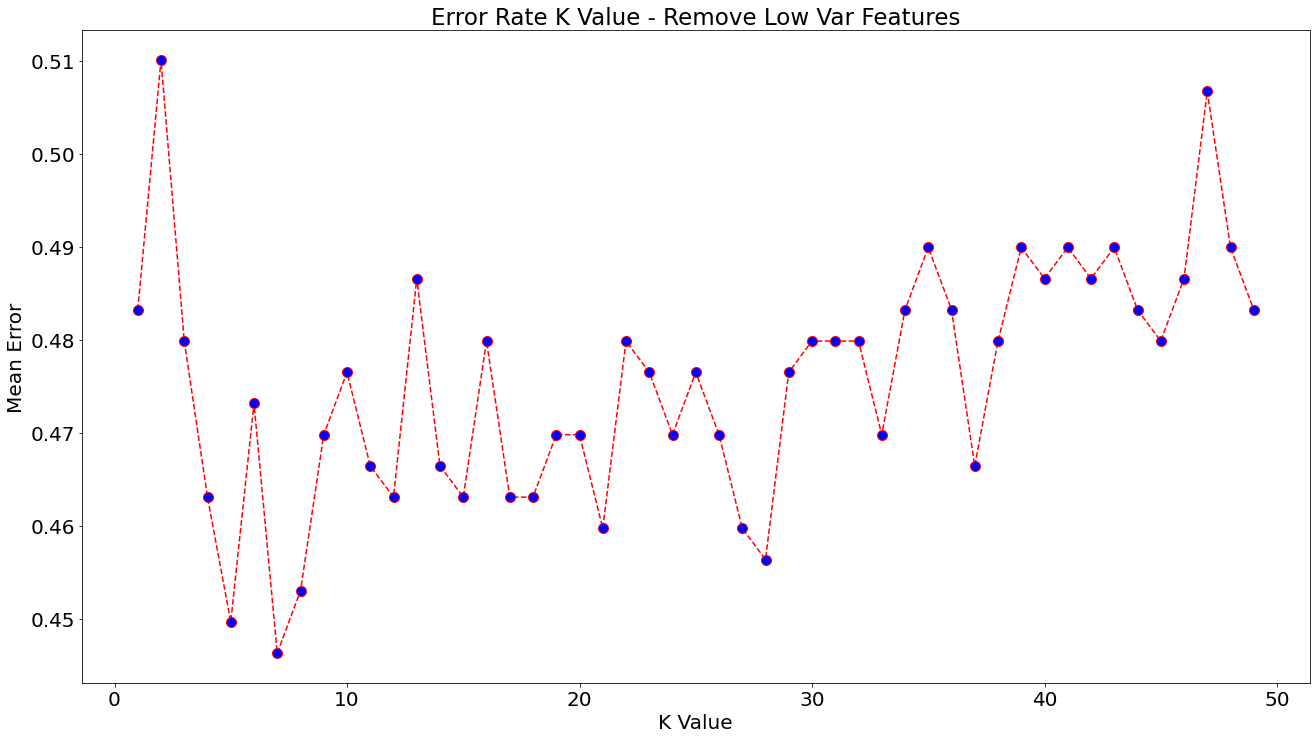

[[18  3  9  5  5  7]
 [ 1 52  0  2  1  0]
 [ 4  0 19  8  4  4]
 [ 6  2  4 32  7  2]
 [ 2  2  5 18 18  5]
 [ 5  0 14  3  5 26]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        47
           1       0.88      0.93      0.90        56
           2       0.37      0.49      0.42        39
           3       0.47      0.60      0.53        53
           4       0.45      0.36      0.40        50
           5       0.59      0.49      0.54        53

    accuracy                           0.55       298
   macro avg       0.54      0.54      0.54       298
weighted avg       0.56      0.55      0.55       298



In [37]:
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold = .5)

X_high_Var = thresholder.fit_transform(X_array)

        
print('#############################')
print(f'3 Feature from real data remove')
print(X_high_Var.shape)
print('#############################')


X = X_high_Var

X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2 , random_state = 42 )

 
# for analysing about "k"

error = []
min_k=0
min_err = 100
for i in range (1 , 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    if error[i-1] < min_err:
        min_err = error[i-1]
        min_k = i
        
print('#############################')
print (f'The best K is : {min_k}')
print('#############################')

plt.figure(figsize = (22,12))
plt.plot(range (1,50) , error , color = 'red' , linestyle = 'dashed' 
         , marker ='o' , markerfacecolor = 'blue' , markersize = 10)

plt.title ('Error Rate K Value - Remove Low Var Features' , fontsize = 23)
plt.xlabel('K Value' ,fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Mean Error' , fontsize=20)
plt.show()

classifier = KNeighborsClassifier( n_neighbors= min_k)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test , y_pred))
           

# RFE

#### Recersive Feature Elimination

We must rank each Column by Eval fun

# " B 10 "


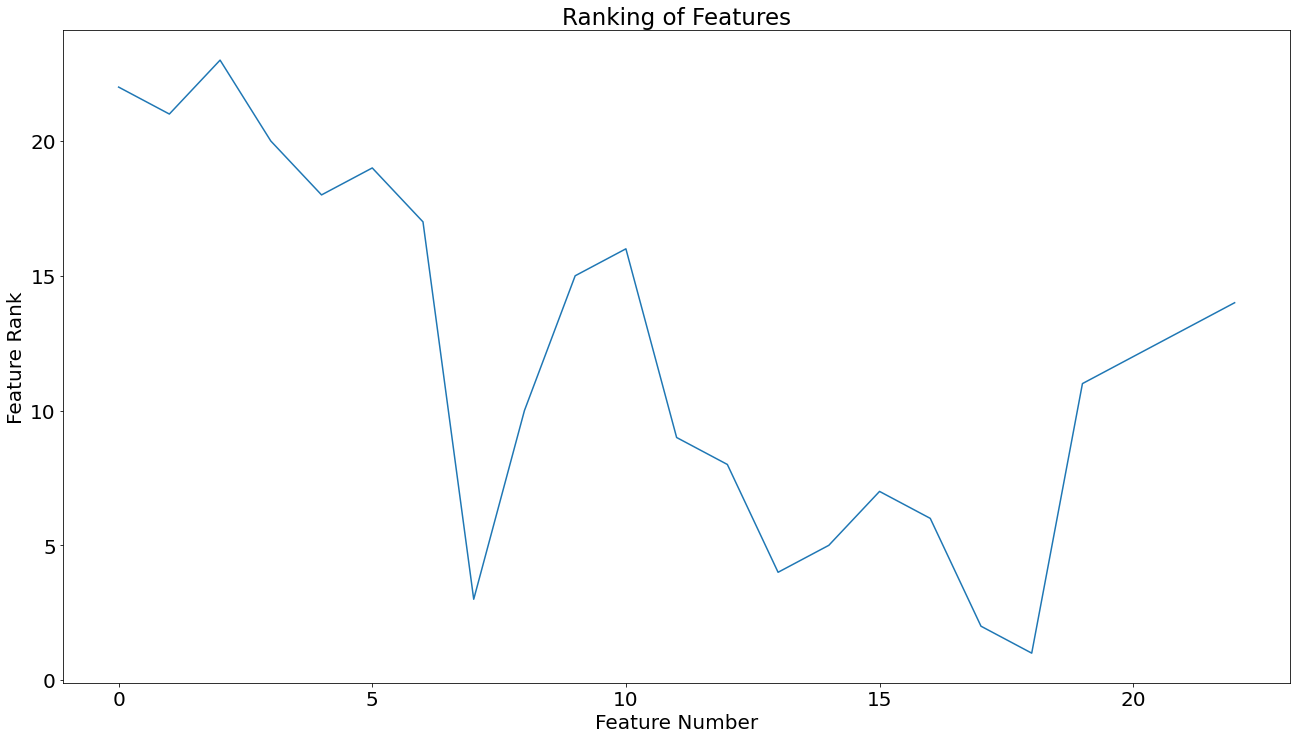

In [43]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

svc = SVC(kernel="linear" , C=1)
rfe = RFE(estimator=svc , n_features_to_select= 1 , step=1)
rfe.fit(X,y)
ranking = rfe.ranking_

plt.figure(figsize = (22,12))
plt.title ('Ranking of Features' , fontsize = 23)
plt.xlabel('Feature Number' ,fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Feature Rank' , fontsize=20)
plt.plot(ranking)

plt.show()

# Recersive Feature Elimination With Cross-Validation

### Find Best amount Of Features

# " B 11 "

#########################
22
#########################


C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


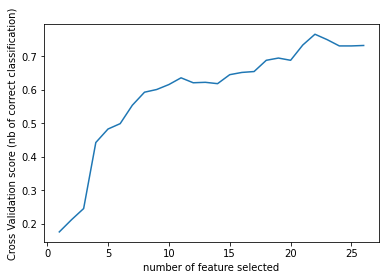

In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

svc = SVC(kernel = "linear")

rfecv = RFECV(estimator = svc , step =1 , cv = StratifiedKFold(2)
             , scoring = 'accuracy')

rfecv.fit(X,y)

print('#########################')
print('Best Number of Feature is :' , rfecv.n_features_)
print('#########################')

plt.figure()
plt.xlabel("number of feature selected")
plt.ylabel("Cross Validation score (nb of correct classification)")
plt.plot(range(1,len(rfecv.grid_scores_)+1) , rfecv.grid_scores_[:,0])

plt.show()


# Dimesnsion Reduction

#### PCA

#### Number of optimal Component for PCA

we use latent Variable 
and find that ho precent of Varinace cover with this feature


# " B 12 "


<Figure size 432x288 with 0 Axes>

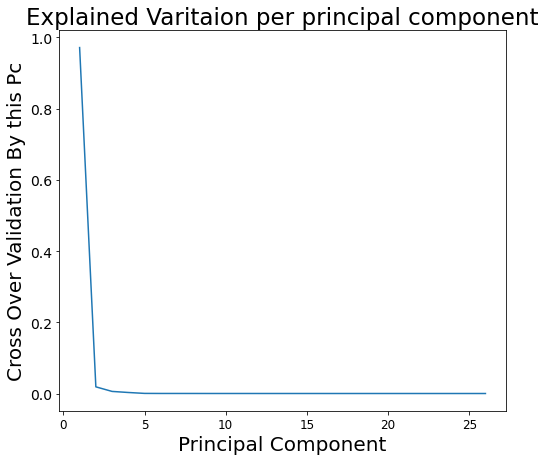

Vector of Variance Cover with 2 firs Feature : [0.97159933 0.0187164 ]


In [45]:
from sklearn.decomposition import PCA
X=X_array
pca_music = PCA(n_components= 26)
principleComponenets_music = pca_music.fit_transform(X)

xs = np.array(range(1,27))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.plot(xs , pca_music.explained_variance_ratio_)
plt.title ('Explained Varitaion per principal component' , fontsize = 23)
plt.xlabel('Principal Component' ,fontsize = 20)
plt.ylabel('Cross Over Validation By this Pc' , fontsize=20)
plt.show()

print('Vector of Variance Cover with 2 firs Feature :' , pca_music.explained_variance_ratio_[0:2])

##### now Visualized with PC1 & PC2

# " B 13 "


<Figure size 432x288 with 0 Axes>

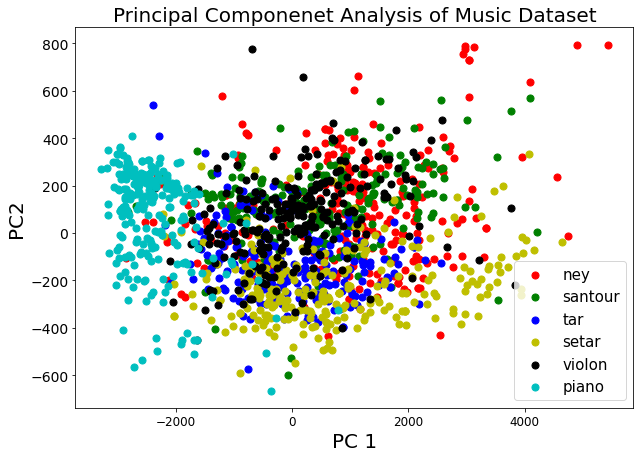

In [44]:
pca_music = PCA(n_components= 2)

X=X_array

principleComponenets_music = pca_music.fit_transform(X)
principal_music_DF = pd.DataFrame(data=principleComponenets_music , columns= [ 'pc1' , 'pc2'])

plt.figure()
plt.figure(figsize= (10,7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('PC 1' , fontsize = 20)
plt.ylabel ('PC2' , fontsize = 20)
plt.title ("Principal Componenet Analysis of Music Dataset" , fontsize =20)
targets = ['ney','santour','tar' , 'setar' , 'violon' , 'piano']
colors = ['r','g','b','y','k','c']
indicesTokeep = data['label']=='ney'

for (target, color) in zip(targets,colors):
    indicesTokeep = data['label']==target
    plt.scatter(principal_music_DF.loc[indicesTokeep , 'pc1'] 
               ,principal_music_DF.loc[indicesTokeep , 'pc2']  , c=color , s= 50)

plt.legend(targets , prop = {'size':15})


In [41]:
'''

با اين که طبق تحليل قبلي، حدود 90 درصد واريانس 
در فقط کامپوننت اول کاور شده بود ولي با استفاده از آن 2  کامپوننت اول، جدايي بين کلاس ها خيلي خوب صورت نگرفته است 
(البته در حالتي که ديتا نرمالايز نشده به اين صورت است ولي  اگر نرمال و استاندارد هم بکينم اوضاع بدتر مي‌شود)

'''

# LDA

in PCA we want choose features that thoes directions covered Max of Variance (unsup)
but in LDA we want choose feature that Max Separabilty of classes


# " B 14 "


<Figure size 432x288 with 0 Axes>

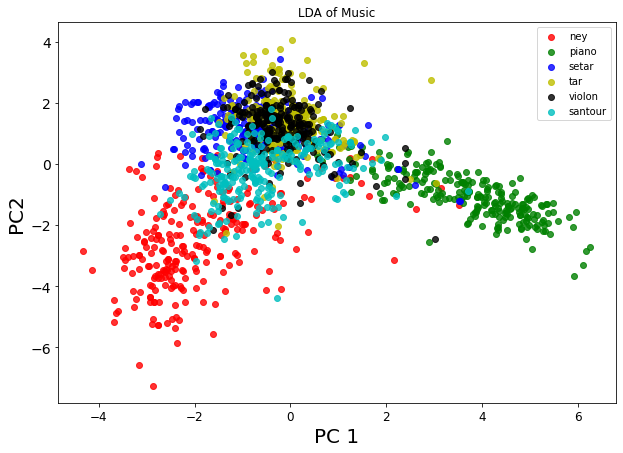

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X=X_array

lda = LinearDiscriminantAnalysis(n_components= 2)
Xr2 = lda.fit (X,y).transform(X)

plt.figure()
plt.figure(figsize= (10,7))
target_names= ['ney','piano','setar' , 'tar' , 'violon' , 'santour']
colors = ['r','g','b','y','k','c']
lw=2
for color,i,target_name in zip(colors, [0,1,2,3,4,5] , target_names):
    plt.scatter(Xr2[y==i , 0] ,Xr2[y==i ,1] , alpha= .8 , color = color,
               label = target_name)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('PC 1' , fontsize = 20)
plt.ylabel ('PC2' , fontsize = 20)
plt.legend(loc = 'best' , shadow = False , scatterpoints = 1)
plt.title('LDA of Music')
plt.show()


    
    

In [ ]:
'''
LDA, Separate Data better than PCA

'''

# Use KNN for Classfication

after feature conditiong

# " B 15 "


#############################
The best K is : 7
#############################


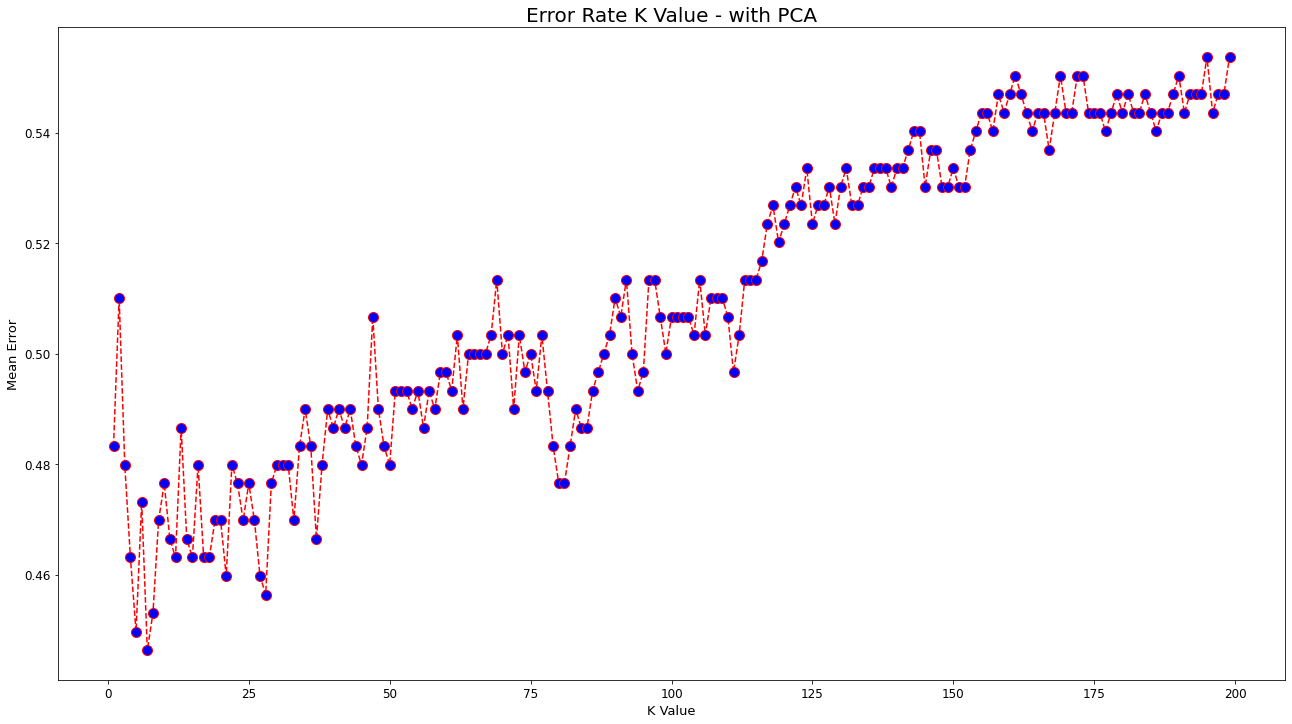

[[18  3  9  5  5  7]
 [ 1 52  0  2  1  0]
 [ 4  0 19  8  4  4]
 [ 6  2  4 32  7  2]
 [ 2  2  5 18 18  5]
 [ 5  0 14  3  5 26]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        47
           1       0.88      0.93      0.90        56
           2       0.37      0.49      0.42        39
           3       0.47      0.60      0.53        53
           4       0.45      0.36      0.40        50
           5       0.59      0.49      0.54        53

    accuracy                           0.55       298
   macro avg       0.54      0.54      0.54       298
weighted avg       0.56      0.55      0.55       298



In [53]:
X_train, X_test, y_train, y_test = train_test_split(principleComponenets_music, y, test_size=0.2 , random_state =42 )

error = []
min_k=0
min_err = 100
for i in range (1 , 200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    if error[i-1]<min_err:
        min_err = error[i-1]
        min_k = i

print('#############################')
print (f'The best K is : {min_k}')
print('#############################')


plt.figure(figsize = (22,12))
plt.plot(range (1,200) , error , color = 'red' , linestyle = 'dashed'
         , marker ='o' , markerfacecolor = 'blue' , markersize = 10)
plt.title ('Error Rate K Value - with PCA' , fontsize = 20)
plt.xticks(fontsize = 12)
plt.xlabel('K Value' , fontsize= 13)
plt.yticks(fontsize = 12)
plt.ylabel('Mean Error' , fontsize = 13)
plt.show()

classifier = KNeighborsClassifier( n_neighbors= min_k)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test , y_pred))